In [35]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [36]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [37]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [38]:
market_data_df.columns


Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [39]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

scaler = StandardScaler()
scaler.fit(market_data_df)
scaled_data = scaler.transform(market_data_df)


In [40]:
# Create a DataFrame with the scaled data

scaled_df = pd.DataFrame(scaled_data, columns=market_data_df.columns)



# Copy the crypto names from the original data

scaled_df["coin_id"] = market_data_df.index

# Set the coinid column as index

scaled_df = scaled_df.set_index("coin_id")

# Display sample data

scaled_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [41]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11

k_list = range(1, 11)
k_list
   

# Create an empty list to store the inertia values
inertia = []


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list



for k in k_list:
    model = KMeans(n_clusters=k, random_state=1, n_init='auto')
    model.fit(scaled_df)
    inertia.append(model.inertia_)



# Create a dictionary with the data to plot the Elbow curve
print(k_list)
print(inertia)

k_dict ={
    'k': k_list,
    'inertia': inertia
}
# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(k_dict)

# Display the DataFrame
elbow_df



c:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

range(1, 11)
[287.0, 212.12334207486256, 145.89793985195843, 131.4573704617119, 66.31710564419653, 57.402668039463734, 49.21264393291687, 44.799803879910954, 33.8594682589509, 29.25031364392867]


,k,inertia
0,1,287.000000
1,2,212.123342
2,3,145.897940
3,4,131.457370
4,5,66.317106
5,6,57.402668
6,7,49.212644
7,8,44.799804
8,9,33.859468
9,10,29.250314


<Axes: xlabel='k'>

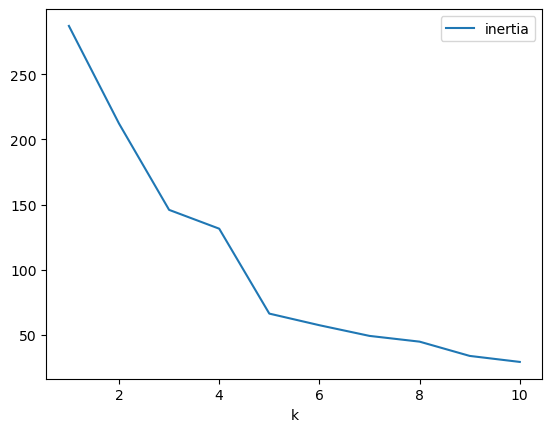

In [42]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.plot(x='k', y='inertia')

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**k=4 seems to have the sharpest "elbow." We could confirm this with some more math, but it probably isn't necessary.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [43]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4)

In [44]:
# Fit the K-Means model using the scaled data
model.fit(scaled_df)

c:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [45]:
# Predict the clusters to group the cryptocurrencies using the scaled data

preds = model.predict(scaled_df)

# View the resulting array of cluster values.
preds

array([0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 0, 3, 3, 2, 3, 3, 3, 3])

In [46]:
# Create a copy of the DataFrame
scaled_df_copy = scaled_df.copy()

In [47]:
# Add a new column to the DataFrame with the predicted clusters

scaled_df_copy['Cluster'] = preds


# Display sample data
scaled_df_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,3
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,3
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

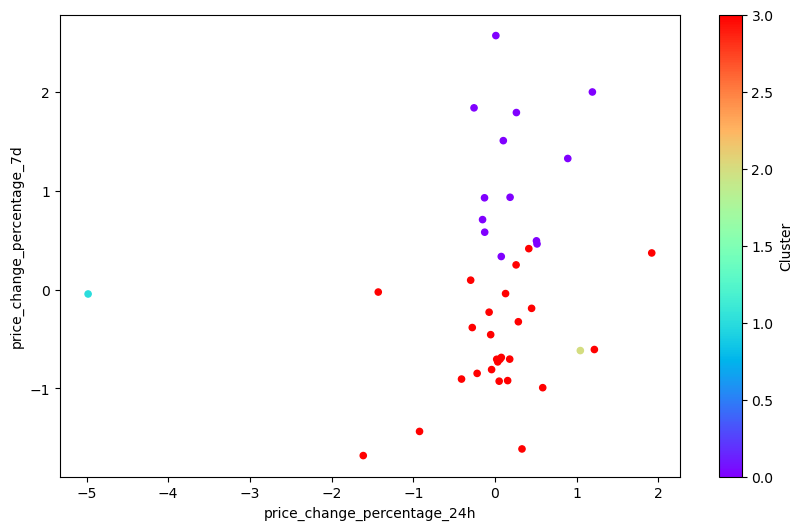

In [48]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.

    # Create the scatter plot
scaled_df_copy.plot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c='Cluster',  # Color by cluster
    cmap='rainbow',
    colorbar=True,
    figsize=(10, 6)
)



### Optimize Clusters with Principal Component Analysis.

In [49]:
# Create a PCA model instance and set `n_components=3`.
# Create a PCA model instance with 3 components
pca = PCA(n_components=3)



In [50]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.


# View the first five rows of the DataFrame. 
# Assuming scaled_df is your original scaled DataFrame
# Create a PCA model instance with 3 components
pca = PCA(n_components=3)

# Fit and transform the data to 3 principal components
pca_components = pca.fit_transform(scaled_df)

# Create a new DataFrame with the PCA components
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2', 'PC3'])
pca_df["coin_id"] = market_data_df.index
pca_df = pca_df.set_index("coin_id")
# Print the first few rows of the PCA DataFrame
pca_df.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** In this case, the explained variance ratios for the three principal components are:

PC1: 0.3719856
PC2: 0.34700813
PC3: 0.17603793
To find the total explained variance for the three principal components, you sum these values:
Total explained variance
=
0.3719856
+
0.34700813
+
0.17603793
=
0.89503166
Total explained variance=0.3719856+0.34700813+0.17603793=0.89503166
This means that the first three principal components together explain approximately 89.50% of the total variance in the dataset.

### Find the Best Value for k Using the PCA Data

In [53]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_list = range(1, 11)
k_list
   
# Create an empty list to store the inertia values

inertia = []

# Create a for loop to compute the inertia with each possible value of k

# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list


# Create a dictionary with the data to plot the Elbow curve


# Create a DataFrame with the data to plot the Elbow curve


# Display the DataFrame



for k in k_list:
    model = KMeans(n_clusters=k, random_state=1, n_init='auto')
    model.fit(pca_df)
    inertia.append(model.inertia_)





k_dict ={
    'k': k_list,
    'inertia': inertia
}
# Create a DataFrame with the data to plot the Elbow curve
elbow_pca_df = pd.DataFrame(k_dict)

# Display the DataFrame
elbow_pca_df

c:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

,k,inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,39.094217
5,6,27.961695
6,7,24.462735
7,8,19.451747
8,9,13.755814
9,10,13.119661


<Axes: xlabel='k'>

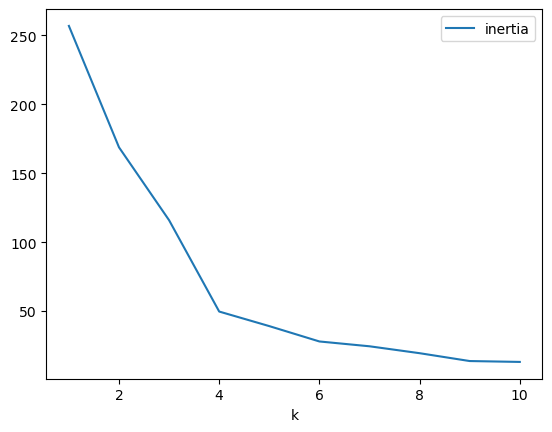

In [54]:
# Plot a line chart with all the inertia values computed with 

elbow_pca_df.plot(x='k', y='inertia')

# the different values of k to visually identify the optimal value for k.


#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for k is 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, it doesn't.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [55]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4)

# Fit the K-Means model using the PCA data


In [56]:
# Predict the clusters to group the cryptocurrencies using the PCA data

model.fit (pca_df)
# Print the resulting array of cluster values.


c:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [57]:
clusters_pca = model.predict(pca_df)
print (clusters_pca)


[0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 2 0 1 1 3
 1 1 1 1]


In [58]:
# Create a copy of the DataFrame with the PCA data
clusters_pca_predictions_df = pca_df.copy()

# Add a new column to the DpcaataFrame with the predicted clusters

clusters_pca_predictions_df["Cluster"] = clusters_pca

# Display sample data
clusters_pca_predictions_df.head()

,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,1
ripple,-0.471835,-0.222660,-0.479053,1
bitcoin-cash,-1.157800,2.041209,1.859715,0


<Axes: xlabel='PC1', ylabel='PC2'>

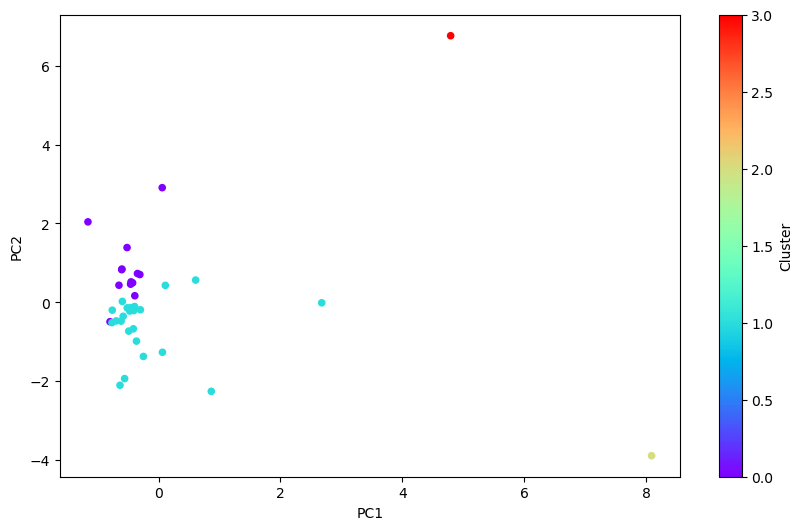

In [59]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 

clusters_pca_predictions_df.plot.scatter(
    x='PC1',
    y='PC2',
    c='Cluster',  # Color by cluster
    cmap='rainbow',
    colorbar=True,
    figsize=(10, 6)
)


### Determine the Weights of Each Feature on each Principal Component

In [64]:
# Use the columns from the original scaled DataFrame as the index.
pca_components_df = pd.DataFrame(pca.components_.T, columns= ["PCA1", "PCA2", "PCA3"], index=scaled_df.columns)

pca_components_df


,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** • PCA1 is most influenced by price_change_percentage_200d and price_change_percentage_1y positively, and by price_change_percentage_24h negatively.
• PCA2 is most influenced by price_change_percentage_30d and price_change_percentage_14d positively, and by price_change_percentage_1y negatively.
• PCA3 is most influenced by price_change_percentage_7d positively, and by price_change_percentage_60d negatively.

    